<a href="https://colab.research.google.com/github/hashiramauchiha/Machine-Learning-Projects/blob/main/Instagram_Post_Reach_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some of the Libraries

In [ ]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [ ]:
dataframe = "https://raw.githubusercontent.com/WidhyaOrg/datasets/master/instagram_reach.csv"

In [ ]:
dataframe_raw = pd.read_csv(dataframe)

In [ ]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


**Making a Deep Copy of the CSV**

In [ ]:
df = dataframe_raw.copy(deep =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [ ]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


**Let's See what peoples are saying in Comments**

In [ ]:
def WordCloudPlotter(dfColumn):
    colData = df[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

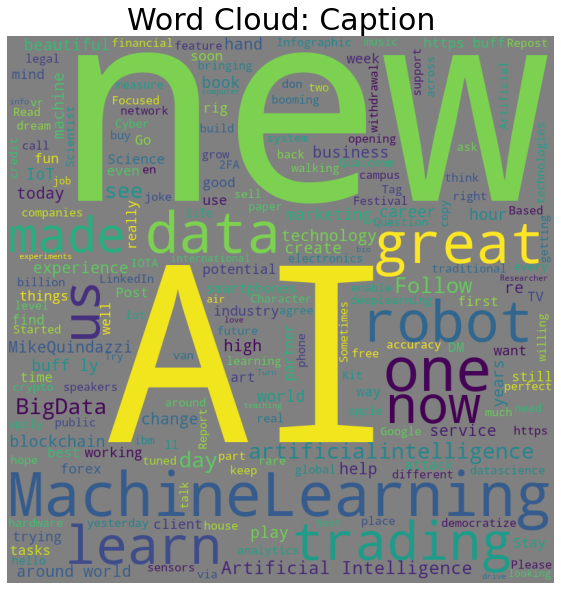

In [ ]:
WordCloudPlotter('Caption')

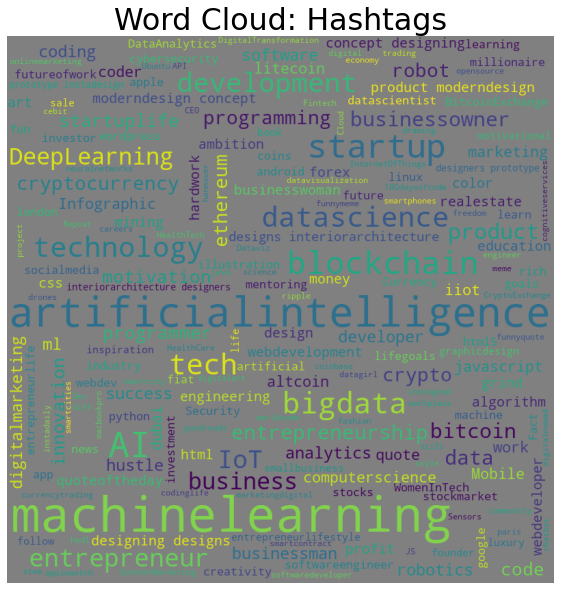

In [ ]:
WordCloudPlotter('Hashtags')

In [ ]:
df['Time since posted'] = df['Time since posted'].str.replace('hours'," ")

In [ ]:
df['Time since posted'] =pd.to_numeric(df['Time since posted'])

In [ ]:
df['Time since posted'].head()

0    11
1     2
2     2
3     3
4     3
Name: Time since posted, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    int64 
 7   Likes              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


**Spliting Data into train and test in 80:20 ratio respectively**

In [ ]:
featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')

In [ ]:
target = np.array(df['Likes'], dtype ='float32')

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(featureVector, target, test_size=0.20, random_state=42)

#MODEL BUILDING

Model : LinearRegression

**Linear Regression** Model because as we can see there is a Linear Relationship between **Input** and **Output** variables.So this model will be the best Fit for our data.And the best Part about Linear Regression is that,it not only helps perdict a value,but also helps predict a **range of values** between which the actual value might exist.

In [ ]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [ ]:
pred=lr.predict(x_test)

Just **Comparing** the **Predicted Values** and **Actual Values**

In [ ]:
pred

array([ 38.96718 ,  48.75012 ,  35.288246,  29.33339 ,  29.311293,
       155.15825 ,  34.409935,  29.432821,  78.507706, 125.74315 ,
        48.68383 ,  33.233322,  41.762363,  32.029095,  33.426666,
        40.14379 ,  29.659304,  32.1451  , 103.15566 ,  28.72575 ],
      dtype=float32)

In [ ]:
y_test

array([ 14.,  24.,  21.,  31.,  16., 136.,  20.,  28.,  31., 139.,  30.,
        90.,  10.,  30.,  32.,  30.,  11.,  55.,  80.,  19.],
      dtype=float32)

**CALCULATING MEAN SQUARED ERROR**

In [ ]:
MSE=mean_squared_error(pred,y_test)

In [ ]:
print(MSE)

541.0122


Thank you ;)